In [4]:
from datetime import datetime
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
from vzorci_in_pomozne_definicije import FILENAME_POPOLNI_PODATKI_KARTE_JSON

In [5]:
podatkovna_baza = pd.read_json(FILENAME_POPOLNI_PODATKI_KARTE_JSON)

# Analiza kart glede na redkost

Kot prvo me je zanimalo, kakšna je povezava med redkostjo in ceno kart. Zelo hitro se je izkazalo, da povprečje ne bo dobro merilo, saj so nekatere starejše karte izredno drage (in močno zaželene pri zbirateljih).

<AxesSubplot: title={'center': 'Deleži redkosti kart'}>

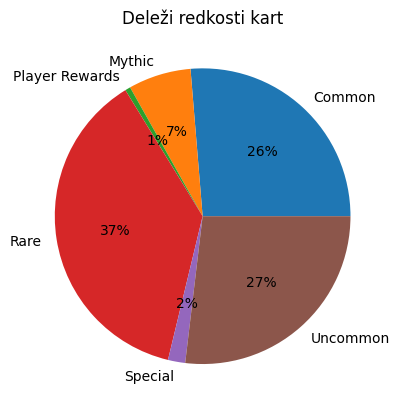

In [6]:
delezi_redkosti = podatkovna_baza.groupby("redkost").size()
delezi_redkosti.plot(kind="pie", autopct='%1.0f%%', title="Deleži redkosti kart")

Na spodnjih dveh grafih bo komu morda presenetljivo dejstvo, da so v povprečju *Rare* karte najdražje (čeprav so okoli 6-krat pogostejše od *Mythic*-ov). Razlog je preprost: *Mythic* karte obstajajo šele od leta 2008, zato so najdražje karte praktično vse *Rare*. Razvidno je, da so ameriške karte v povprečju občutno dražje, prav tako pa je mediana dosti bolj prevzdignjena. Hkrati pa so cenovna razmerja pri ameriških in evropskih kartah zelo podobna, kar razberemo iz podobne oblike grafov.

Text(0, 0.5, 'ameriška cena ($)')

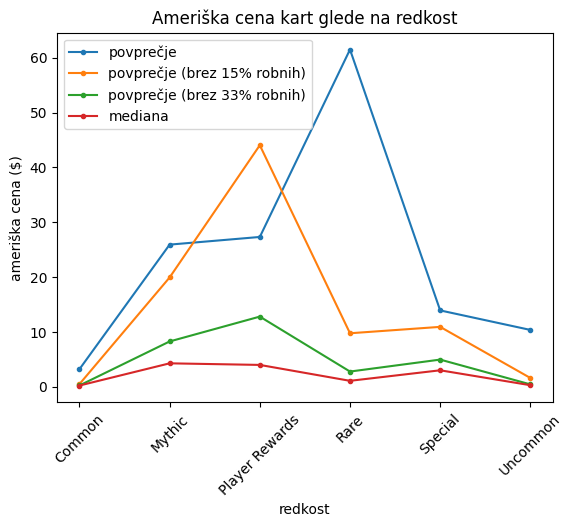

In [7]:
def q67(x):
    return x.quantile(0.67)

def q85(x):
    return x.quantile(0.85)

povprecna_cena_glede_na_redkost = podatkovna_baza.groupby("redkost")["povprecna_cena"].mean()
mediana_cena_glede_na_redkost = podatkovna_baza.groupby("redkost")["povprecna_cena"].median()   
povprecna_cena_glede_na_redkost_85 = podatkovna_baza.groupby("redkost").agg({'povprecna_cena': q85})["povprecna_cena"]
povprecna_cena_glede_na_redkost_67 = podatkovna_baza.groupby("redkost").agg({'povprecna_cena': q67})["povprecna_cena"]

df = pd.DataFrame({'povprečje': povprecna_cena_glede_na_redkost,
                   'povprečje (brez 15% robnih)': povprecna_cena_glede_na_redkost_85,
                   'povprečje (brez 33% robnih)': povprecna_cena_glede_na_redkost_67,
                   'mediana': mediana_cena_glede_na_redkost}, index=None)

ax = df.plot(rot=45, title = "Ameriška cena kart glede na redkost", style='.-')
ax.set_ylabel("ameriška cena ($)")



Text(0, 0.5, 'evropska cena (€)')

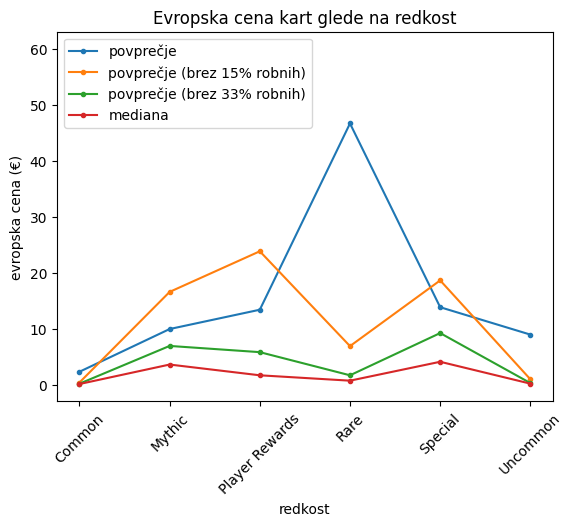

In [8]:
povprecna_cena_glede_na_redkost_eu = podatkovna_baza.groupby("redkost")["povprecje_eu"].mean()
mediana_cena_glede_na_redkost_eu = podatkovna_baza.groupby("redkost")["povprecje_eu"].median()   
povprecna_cena_glede_na_redkost_85_eu = podatkovna_baza.groupby("redkost").agg({'povprecje_eu': q85})["povprecje_eu"]
povprecna_cena_glede_na_redkost_67_eu = podatkovna_baza.groupby("redkost").agg({'povprecje_eu': q67})["povprecje_eu"]

df = pd.DataFrame({'povprečje': povprecna_cena_glede_na_redkost_eu,
                   'povprečje (brez 15% robnih)': povprecna_cena_glede_na_redkost_85_eu,
                   'povprečje (brez 33% robnih)': povprecna_cena_glede_na_redkost_67_eu,
                   'mediana': mediana_cena_glede_na_redkost_eu}, index=None)

ax = df.plot(rot=45, title = "Evropska cena kart glede na redkost", style='.-', ylim=(-3, 63))
ax.set_ylabel("evropska cena (€)")

<AxesSubplot: title={'center': 'Cenovni razredi kart glede na ameriške cene ($)'}>

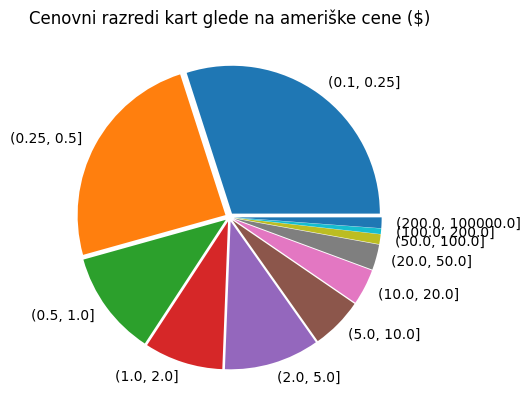

In [9]:
cenovni_razredi_kart = [0, 0.05, 0.10, 0.25, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 100000]
explode = tuple([0.03 for _ in range(np.size(cenovni_razredi_kart) - 1)])

podatki_po_ceni_us = podatkovna_baza.groupby(pd.cut(podatkovna_baza["povprecna_cena"], cenovni_razredi_kart)).size()
podatki_po_ceni_us[2:].plot(kind = "pie", explode = explode[2:], title='Cenovni razredi kart glede na ameriške cene ($)')

Pri ameriških cenah sem prva dva razreda zanemaril, saj sta bila skoraj popolnoma prazna.

<AxesSubplot: title={'center': 'Cenovni razredi kart glede na evropske cene (€)'}>

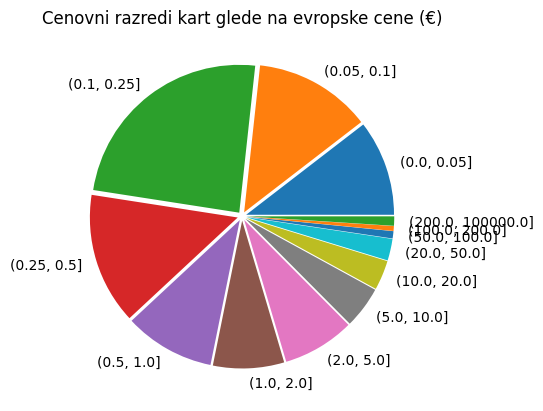

In [10]:
podatki_po_ceni_eu = podatkovna_baza.groupby(pd.cut(podatkovna_baza["povprecje_eu"], cenovni_razredi_kart)).size()
podatki_po_ceni_eu.plot(kind = "pie", explode = explode, title='Cenovni razredi kart glede na evropske cene (€)')

# Analiza različnih tipov kart

Poleg cene in redkosti so me zanimali tudi podatki o raznih tipih [(*type*)](https://mtg.fandom.com/wiki/Card_type) in podtipih [(*subtype*)](https://mtg.fandom.com/wiki/Subtype) kart.

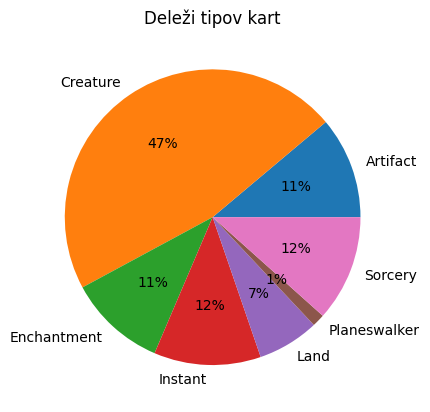

In [11]:
povezovalna_cardtype = pd.read_csv(os.path.join("Podatki", "Povezovalne_tabele", f"povezovalna_cardtype.csv"))
grupa_po_cardtypu = povezovalna_cardtype.groupby("cardtype")
velikost_grupe_po_cardtypu = grupa_po_cardtypu.size()
velikost_grupe_po_cardtypu[velikost_grupe_po_cardtypu > 100].plot.pie(title='Deleži tipov kart', autopct='%1.0f%%')
dovolj_veliki_kljuci_cardtypov = velikost_grupe_po_cardtypu[velikost_grupe_po_cardtypu > 100].keys()


<AxesSubplot: title={'center': 'Frekvenca najpogostejših creature tipov kart'}, xlabel='subtype'>

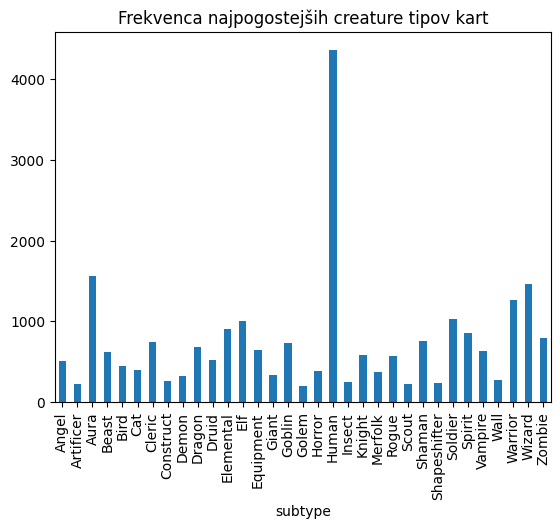

In [12]:
povezovalna_subtype = pd.read_csv(os.path.join("Podatki", "Povezovalne_tabele", "povezovalna_subtype.csv"))
grupa_po_subtypu = povezovalna_subtype.groupby("subtype")
velikost_grupe_po_subtypu = grupa_po_subtypu.size()
velikost_grupe_po_subtypu[velikost_grupe_po_subtypu > 200].plot.bar(title='Frekvenca najpogostejših creature tipov kart')
#povprecna_cena_glede_na_cardtype = podaytkovna_baza.groupby("cardtype")["povprecna_cena"].median()

Na spodnjem grafu razlika med različnimi vrednostmi lepo prikaže, kako majhno število kart po ceni močno odstopa od povprečja.

Text(0, 0.5, 'ameriška cena ($)')

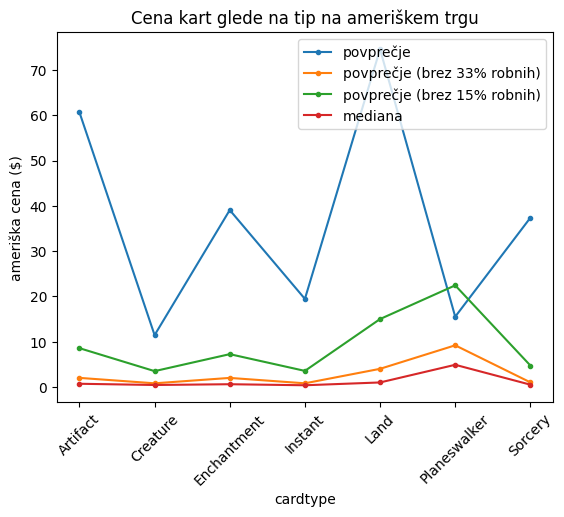

In [13]:
tabela_povprecnih_cen = podatkovna_baza[["id_karte", "povprecna_cena"]].merge(povezovalna_cardtype)
povprecna_cena = tabela_povprecnih_cen.groupby("cardtype")["povprecna_cena"].mean()[dovolj_veliki_kljuci_cardtypov]
povprecna_cena_67 = tabela_povprecnih_cen.groupby("cardtype").agg({'povprecna_cena': q67}).loc[dovolj_veliki_kljuci_cardtypov]["povprecna_cena"]
povprecna_cena_85 = tabela_povprecnih_cen.groupby("cardtype").agg({'povprecna_cena': q85}).loc[dovolj_veliki_kljuci_cardtypov]["povprecna_cena"]
mediana = tabela_povprecnih_cen.groupby("cardtype")["povprecna_cena"].median()[dovolj_veliki_kljuci_cardtypov]

df = pd.DataFrame({'povprečje': povprecna_cena,
                   'povprečje (brez 33% robnih)': povprecna_cena_67,
                   'povprečje (brez 15% robnih)': povprecna_cena_85,
                   'mediana': mediana}, index=dovolj_veliki_kljuci_cardtypov)

ax = df.plot(rot=45, title="Cena kart glede na tip na ameriškem trgu", style='.-')
ax.set_ylabel("ameriška cena ($)")

Text(0, 0.5, 'evropska cena (€)')

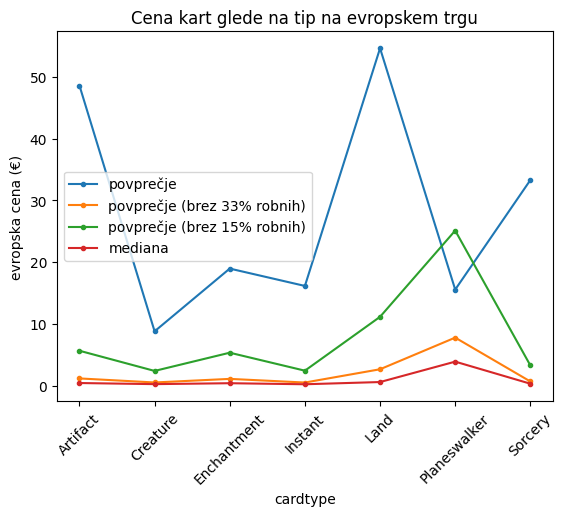

In [14]:
tabela_povprecnih_cen_eu = podatkovna_baza[["id_karte", "povprecje_eu"]].merge(povezovalna_cardtype)
povprecna_cena_eu = tabela_povprecnih_cen_eu.groupby("cardtype")["povprecje_eu"].mean()[dovolj_veliki_kljuci_cardtypov]
povprecna_cena_eu_67 = tabela_povprecnih_cen_eu.groupby("cardtype").agg({'povprecje_eu': q67}).loc[dovolj_veliki_kljuci_cardtypov]["povprecje_eu"]
povprecna_cena_eu_85 = tabela_povprecnih_cen_eu.groupby("cardtype").agg({'povprecje_eu': q85}).loc[dovolj_veliki_kljuci_cardtypov]["povprecje_eu"]
mediana = tabela_povprecnih_cen_eu.groupby("cardtype")["povprecje_eu"].median()[dovolj_veliki_kljuci_cardtypov]

df = pd.DataFrame({'povprečje': povprecna_cena_eu,
                   'povprečje (brez 33% robnih)': povprecna_cena_eu_67,
                   'povprečje (brez 15% robnih)': povprecna_cena_eu_85,
                   'mediana': mediana}, index=dovolj_veliki_kljuci_cardtypov)

ax = df.plot(rot=45, title="Cena kart glede na tip na evropskem trgu", style='.-')
ax.set_ylabel("evropska cena (€)")

# Analiza posameznih setov glede na datum izida

Zanimalo me je, kateri seti so bili najbolj in kateri najmanj vredni, ter kakšna je korelacija med starostjo seta ter številom kart in njegovo vrednostjo.

Pri tem je sem gledal porvprečno vrednost kart v setu, saj je ta neodvisna njihovega števila. Povsem po pričakovanju sta na vrhu seta alfa (**LEA = Limited Edition Alpha**) in beta (**LEB = Limited Edition Beta**). 

In [15]:
grupa_setov = podatkovna_baza.groupby("set")
grupa_setov['povprecna_cena'].mean().sort_values(ascending=False).head(10)


set
LEA     2022.230601
LEB      913.761745
PSUM     794.680426
2ED      396.113984
ARN      271.257582
CED      110.726471
CEI       94.022894
PTK       91.854121
LEG       91.066000
ATQ       89.785200
Name: povprecna_cena, dtype: float64

Spodnji graf prikazuje povprečno (ameriško) ceno in število kar v setih glede na datum izida. Očitno je, da so seti zelo podobnih vrednosti, z izjemo nekaterih starejših, ki so veliko vrednješi. Omenil bi še, da so podatki za odstopajoči set (PSUM), ki je izšel leta 2007, povsem napačno navedeni na strani MTGStocks (v resnici sta v setu samo dve karti, ki staneta v povprečju okoli kot 5$).

Mimogrede: na x-osi sem izpisal vsak 30. datum seta. Odtod lahko sklepamo, da se je frekvenca izidov setov močno povišala v zadnjih letih.

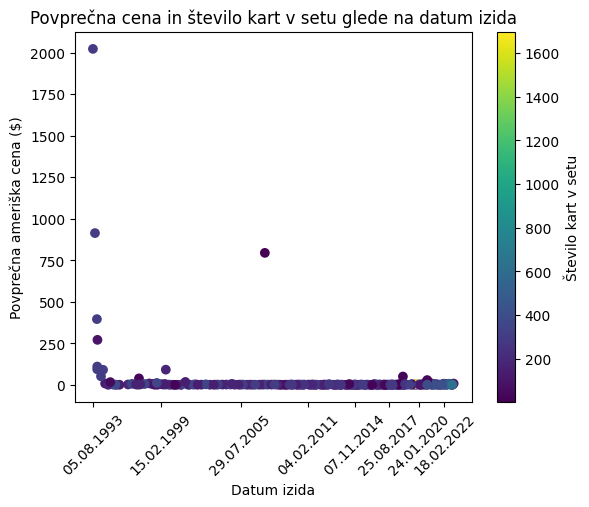

In [16]:
plot_data = grupa_setov[['datum_izida', 'povprecna_cena', 'st_kart']].mean()
plot_data = plot_data[~plot_data['datum_izida'].isna()]

plt.scatter(plot_data['datum_izida'], plot_data['povprecna_cena'], c=plot_data['st_kart'])
plt.xlabel('Datum izida')
plt.ylabel('Povprečna ameriška cena ($)')
plt.title('Povprečna cena in število kart v setu glede na datum izida')
plt.colorbar(orientation="vertical", label="Število kart v setu")
plt.xticks(rotation=45)
plt.xticks(plot_data['datum_izida'].sort_values()[::30] , [datetime.fromtimestamp(x / 1000).strftime("%d.%m.%Y") for x in plot_data['datum_izida'].sort_values()][::30])
plt.show()


Seveda na zgornjem grafu ne moremo natančno videti trendov za novejše sete, zato raje uporabimo logaritmično skalo. Zaradi lepšega barvnega izgleda odstranimo še set, ki ima več kot 1600 kart. 

Iz odtenka točk se lepo vidi, da je dandanes v setih več kart, kot jih je bilo včasih. Poleg tega je opazno, da so novejši seti vrednejši od setov med 2000-2015. To je najverjetneje zato, ker so novejše karte bolj relevantne od starejših in zato dražje (hkrati pa niso dovolj relevantne, da bi presegle zbirateljsko vrednost najstarejših).

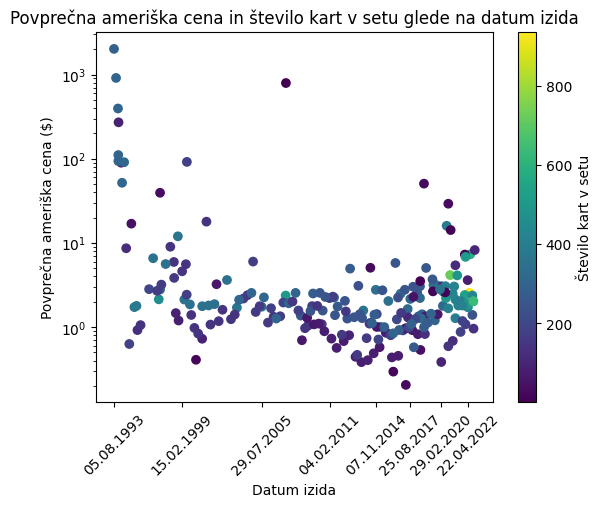

In [17]:
plot_data = grupa_setov[['datum_izida', 'povprecna_cena', 'st_kart']].mean()
plot_data = plot_data[~plot_data['datum_izida'].isna() & (plot_data['st_kart'] < 1000)]

plt.scatter(plot_data['datum_izida'], plot_data['povprecna_cena'], c=plot_data['st_kart'])
plt.xlabel('Datum izida')
plt.ylabel('Povprečna ameriška cena ($)')
plt.title('Povprečna ameriška cena in število kart v setu glede na datum izida')
plt.colorbar(orientation="vertical", label="Število kart v setu")
plt.xticks(rotation=45)
plt.xticks(plot_data['datum_izida'].sort_values()[::30] , [datetime.fromtimestamp(x / 1000).strftime("%d.%m.%Y") for x in plot_data['datum_izida'].sort_values()][::30])
plt.yscale('log')
plt.show()


Poglejmo si še isti graf za evropski trg. Zanimvo je, da sta si grafa v logaritmični skali res zelo podobna.

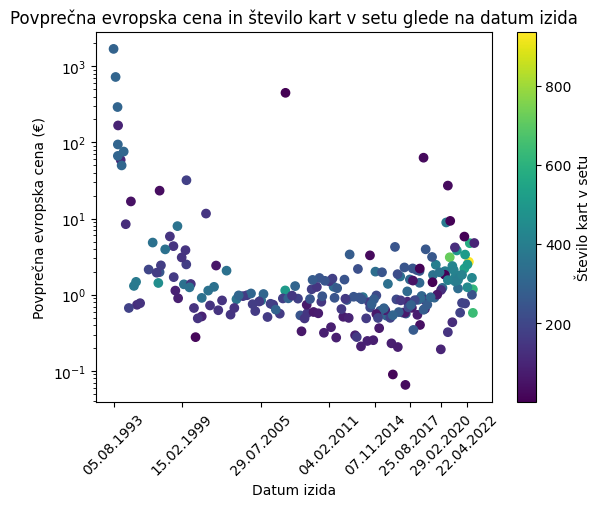

In [18]:
plot_data = grupa_setov[['datum_izida', 'povprecje_eu', 'st_kart']].mean()
plot_data = plot_data[~plot_data['datum_izida'].isna() & (plot_data['st_kart'] < 1000)]

plt.scatter(plot_data['datum_izida'], plot_data['povprecje_eu'], c=plot_data['st_kart'])
plt.xlabel('Datum izida')
plt.ylabel('Povprečna evropska cena (€)')
plt.title('Povprečna evropska cena in število kart v setu glede na datum izida')
plt.colorbar(orientation="vertical", label="Število kart v setu")
plt.xticks(rotation=45)
plt.xticks(plot_data['datum_izida'].sort_values()[::30] , [datetime.fromtimestamp(x / 1000).strftime("%d.%m.%Y") for x in plot_data['datum_izida'].sort_values()][::30])
plt.yscale('log')
plt.show()

Zdaj si poglejmo, kdaj v povprečju karte dosežejo svojo najnižjo in najvišjo ceno, merjeno od izida.

Text(0, 0.5, 'Število tednov')

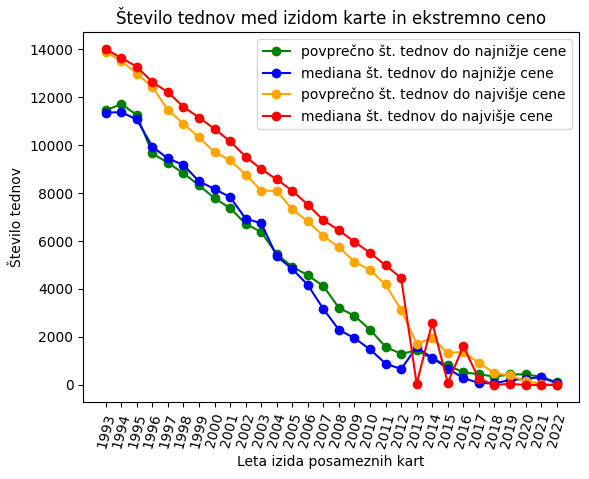

In [21]:
def izrazi_v_tednih(t):
    return t / 620000000

baza_datumov = podatkovna_baza[['datum_izida', 'all_time_low_datum', 'all_time_high_datum']].copy(deep=True)
baza_datumov = baza_datumov[~baza_datumov['datum_izida'].isna()]
baza_datumov["razlika_low"] = baza_datumov["all_time_low_datum"] - baza_datumov["datum_izida"]
baza_datumov["razlika_high"] = baza_datumov["all_time_high_datum"] - baza_datumov["datum_izida"]
baza_datumov[["razlika_low", "razlika_high"]] = baza_datumov[["razlika_low", "razlika_high"]].applymap(izrazi_v_tednih)
baza_datumov["datum_izida"] = baza_datumov["datum_izida"].apply(lambda x: datetime.fromtimestamp(x / 1000).strftime("%d.%m.%Y"))

plot_data = baza_datumov[['datum_izida', 'razlika_low', 'razlika_high']]

grupa_setov_po_letih = plot_data.groupby(plot_data["datum_izida"].map(lambda x: x[-4:]))

x = grupa_setov_po_letih["razlika_low"].median().index
y1 = grupa_setov_po_letih["razlika_low"].mean()
y2 = grupa_setov_po_letih["razlika_low"].median()
y3 = grupa_setov_po_letih["razlika_high"].mean()
y4 = grupa_setov_po_letih["razlika_high"].median()

plt.plot(x, y1, "-o", label = 'povprečno št. tednov do najnižje cene', color='green')
plt.plot(x, y2, "-o",label = 'mediana št. tednov do najnižje cene', color='blue')
plt.plot(x, y3, "-o",label = 'povprečno št. tednov do najvišje cene', color='orange')
plt.plot(x, y4, "-o",label = 'mediana št. tednov do najvišje cene', color='red')
plt.xticks(rotation=75)
plt.legend()
plt.title('Število tednov med izidom karte in ekstremno ceno')
plt.xlabel('Leta izida posameznih kart')
plt.ylabel('Število tednov')

Prav nič presenetljivega ni dejstvo, imajo starejši seti zelo veliko povprečno razliko tednov med izidom in najvišjo ceno (ker vrednost mnogim kartam s časom narašča). Dosti bolj presenetljivo pa je to, da imajo tako visko povprečno razliko tednov med izidom in najnižjo ceno. Sklepam, da nekaterim kartam vrednost narašča, nekaterim pa pada. Tako imajo starejši seti kljub visoki vrednosti veliko kart z nizkimi vrednostmi, ki višajo povprečje in mediano.

Hkrati pa opazimo, so krivulje v zadnjih petih letih dosti bolj zgoščene. Zato si jih podrobneje oglejmo:

Text(0, 0.5, 'Število tednov')

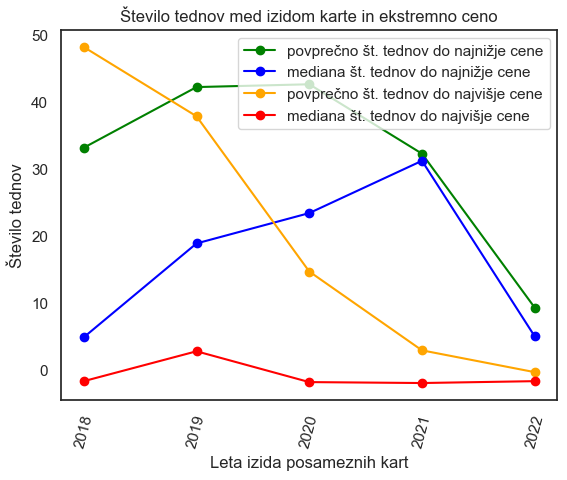

In [ ]:
# plot_data = baza_datumov[['datum_izida', 'razlika_low', 'razlika_high']]

# grupa_setov_po_letih = plot_data.groupby(plot_data["datum_izida"].map(lambda x: x[-4:]))

x = grupa_setov_po_letih["razlika_low"].median().index[-5:]
y1 = grupa_setov_po_letih["razlika_low"].mean()[-5:]
y2 = grupa_setov_po_letih["razlika_low"].median()[-5:]
y3 = grupa_setov_po_letih["razlika_high"].mean()[-5:]
y4 = grupa_setov_po_letih["razlika_high"].median()[-5:]

plt.plot(x, y1, "-o", label = 'povprečno št. tednov do najnižje cene', color='green')
plt.plot(x, y2, "-o",label = 'mediana št. tednov do najnižje cene', color='blue')
plt.plot(x, y3, "-o",label = 'povprečno št. tednov do najvišje cene', color='orange')
plt.plot(x, y4, "-o",label = 'mediana št. tednov do najvišje cene', color='red')
plt.xticks(rotation=75)
plt.legend()
plt.title('Število tednov med izidom karte in ekstremno ceno')
plt.xlabel('Leta izida posameznih kart')
plt.ylabel('Število tednov')

Žal ta graf izgleda precej kaotično, zato se zdi nevarno vleči prehitre zaključke. Bi pa komentiral to, da sta rdeča in rumena krivulja pod ostalima. Možen razlog bi bil v tem, da ima večina kart najvišjo ceno direktno po izidu, takoj zatem pa jim vpade. Poleg tega se zdi smiselno sklepati, da novejše karte v povprečju dosežejo svoj cenovni minimum v manj kot letu dni od izida.

Mimogrede bi še omenil, da so karte naprodaj že pred uradnim izidom seta, zato je mediana števila tednov do najvišje cene lahko negativna.